#### What makes a time series different from a regular regression problem?
* It is time dependent. The basic assumption of a linear regression that the observations are independent doesn’t hold in this case.
* Along with an increasing or decreasing trend, most time series have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, for Christmas holidays, which we will see in this dataset.

#### Patterns in a time series
Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the d. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Care should be taken to not confuse ‘cyclic’ effect with ‘seasonal’ effect.

So, How to diffentiate between a ‘cyclic’ vs ‘seasonal’ paay of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

So, a time series may be imagined as a combination of the trend, seasonality and the error terms.


Another aspect to consider is the cyclic behaviourttern?

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

#### Additive and multiplicative time series

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

Additive time series:
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

#### Why even analyze a time series?

Because it is the preparatory step before you develop a forecast of the series.

Besides, time series forecasting has enormous commercial significance because stuff that is important to a business like demand and sales, number of visitors to a website, stock price etc are essentially time series data.

So what does analyzing a time series involve?

Time series analysis involves understanding various aspects about the inherent nature of the series so that you are better informed to create meaningful and accurate forecasts.

#### What is panel data?
Panel data is also a time based dataset.

The difference is that, in addition to time series, it also contains one or more related variables that are measured for the same time periods.

Typically, the columns present in panel data contain explanatory variables that can be helpful in predicting the Y, provided those columns will be available at the future forecasting period.

Model-based forecasting is the strongest choice when the underlying mechanism, or physics, of the problem is known, and as such it is the right choice in many scientific and engineering situations at Uber. It is also the usual approach in econometrics, with a broad range of models following different theories.

When the underlying mechanisms are not known or are too complicated, e.g., the stock market, or not fully known, e.g., retail sales, it is usually better to apply a simple statistical model. Popular classical methods that belong to this category include ARIMA (autoregressive integrated moving average), exponential smoothing methods, such as Holt-Winters, and the Theta method, which is less widely used, but performs very well. In fact, the Theta method won the M3 Forecasting Competition, and we also have found it to work well on Uber’s time series (moreover, it is computationally cheap).

In recent years, machine learning approaches, including quantile regression forests (QRF), the cousins of the well-known random forest, have become part of the forecaster’s toolkit. Recurrent neural networks (RNNs) have also been shown to be very useful if sufficient data, especially exogenous regressors, are available. Typically, these machine learning models are of a black-box type and are used when interpretability is not a requirement. Below, we offer a high level overview of popular classical and machine learning forecasting methods:

###### Classical & Statistical	
Autoregressive integrated moving average (ARIMA)
Exponential smoothing methods (e.g. Holt-Winters)
Theta

##### Machine Learning

Recurrent neural networks (RNN)
Quantile regression forest (QRF)
Gradient boosting trees (GBM)
Support vector regression (SVR)
Gaussian Process regression (GP)

Interestingly, one winning entry to the M4 Forecasting Competition was a hybrid model that included both hand-coded smoothing formulas inspired by a well known the Holt-Winters method and a stack of dilated long short-term memory units (LSTMs).

Actually, classical and ML methods are not that different from each other, but distinguished by whether the models are more simple and interpretable or more complex and flexible. In practice. classical statistical algorithms tend to be much quicker and easier-to-use.

Comparing forecasting methods
It is important to carry out chronological testing since time series ordering matters. Experimenters cannot cut out a piece in the middle, and train on data before and after this portion. Instead, they need to train on a set of data that is older than the test data.

With this in mind, there are two major approaches, outlined in Figure 4, above: the sliding window approach and the expanding window approach. In the sliding window approach, one uses a fixed size window, shown here in black, for training. Subsequently, the method is tested against the data shown in orange.

On the other hand, the expanding window approach uses more and more training data, while keeping the testing window size fixed. The latter approach is particularly useful if there is a limited amount of data to work with.

It is also possible, and often best, to marry the two methods: start with the expanding window method and, when the window grows sufficiently large, switch to the sliding window method.

Many evaluation metrics have been proposed in this space, including absolute errors and percentage errors, which have a few drawbacks. One particularly useful approach is to compare model performance against the naive forecast. In the case of a non-seasonal series, a naive forecast is when the last value is assumed to be equal to the next value. For a periodic time series, the forecast estimate is equal to the previous seasonal value (e.g., for an hourly time series with weekly periodicity the naive forecast assumes the next value is at the current hour one week ago).

The importance of uncertainty estimation
Determining the best forecasting method for a given use case is only one half of the equation. We also need to estimate prediction intervals. The prediction intervals are upper and lower forecast values that the actual value is expected to fall between with some (usually high) probability, e.g. 0.9. We highlight how prediction intervals work in Figure 5, below:


Figure 5: Prediction intervals are critical to informed decision making. Although point forecasts may be the same, their prediction intervals may be significantly different.
 n Figure 5, the point forecasts shown in purple are exactly the same. However, the prediction intervals in the the left chart are considerably narrower than in the right chart. The difference in prediction intervals results in two very different forecasts, especially in the context of capacity planning: the second forecast calls for much higher capacity reserves to allow for the possibility of a large increase in demand.

Prediction intervals are just as important as the point forecast itself and should always be included in your forecasts. Prediction intervals are typically a function of how much data we have, how much variation is in this data, how far out we are forecasting, and which forecasting approach is used.

When leveraging time series data, forecasting algorithms often require chronological testing, otherwise referred to as backtesting. Simply put, models applying these algorithms should not be trained with date values past the forecast horizon.

A common practice arbitrarily splits a time series into training and validation sets while preserving chronology, similar to randomly choosing one training pass (as displayed in Figure 1). Given Uber’s business metric variance and relatively short lifespan, however, we found this method unreliable. For example, time series models trained with and without data from New Year’s Eve show significant forecasting performance differences given the rapid growth (year-by-year) of our business.

Two types of Backtesting
To achieve a more consistent measure of model performance, we designed a backtesting procedure that applies a cross validation logic that accounts for the sequenced nature of the dataset.

This procedure applies two types of backtesting: sliding window and expanding window. While both have their applicable use cases, the sliding window form achieves a favorable balance between model accuracy and training time, especially when it comes to testing high frequency data such as daily and hourly time series. The expanding window form, on the other hand, is used more often in weekly, monthly, or quarterly time series where the number of historical points are limited.

Next, we outline how these two types of backtesting can be applied to forecasting:

##### Sliding window
The sliding window method requires three hyperparameters: training window size, forecasting window size (horizon), and sliding steps, detailed below:

* Training window size: the number of data points included in a training pass
* Forecasting window size: the number of data points to include in forecasting
* Sliding steps: the number of data points skipped from one pass to another


##### Expanding window
The expanding window form requires four hyperparameters: starting window size, ending window size, forecasting window size, and expanding steps, outlined below:

* Starting window size: the number of data points included in the first training pass
* Ending window size: the number of data points included in the last training pass
* Forecasting window size: number of data points included for forecasting
* Expanding steps: the number of data points added to the training time series from one pass to another
* https://eng.uber.com/forecasting-introduction/


## Overview of the Framework

### Step 1: Visualize the Time Series
It is essential to analyze the trends prior to building any kind of time series model. The details we are interested in pertains to any kind of trend, seasonality or random behaviour in the series. We have covered this part in the second part of this series.

 

### Step 2: Stationarize the Series
Once we know the patterns, trends, cycles and seasonality , we can check if the series is stationary or not. Dickey – Fuller is one of the popular test to check the same. We have covered this test in the first part of this article series. This doesn’t ends here! What if the series is found to be non-stationary?

There are three commonly used technique to make a time series stationary:

1.  Detrending : Here, we simply remove the trend component from the time series. For instance, the equation of my time series is:

x(t) = (mean + trend * t) + error

We’ll simply remove the part in the parentheses and build model for the rest.

 

2. Differencing : This is the commonly used technique to remove non-stationarity. Here we try to model the differences of the terms and not the actual term. For instance,

x(t) – x(t-1) = ARMA (p ,  q)

This differencing is called as the Integration part in AR(I)MA. Now, we have three parameters

p : AR

d : I

q : MA

 

3. Seasonality : Seasonality can easily be incorporated in the ARIMA model directly. More on this has been discussed in the applications part below.

 

### Step 3: Find Optimal Parameters
The parameters p,d,q can be found using  ACF and PACF plots. An addition to this approach is can be, if both ACF and PACF decreases gradually, it indicates that we need to make the time series stationary and introduce a value to “d”.

 

### Step 4: Build ARIMA Model
With the parameters in hand, we can now try to build ARIMA model. The value found in the previous section might be an approximate estimate and we need to explore more (p,d,q) combinations. The one with the lowest BIC and AIC should be our choice. We can also try some models with a seasonal component. Just in case, we notice any seasonality in ACF/PACF plots.

 

### Step 5: Make Predictions
Once we have the final ARIMA model, we are now ready to make predictions on the future time points. We can also visualize the trends to cross validate if the model works fine.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # advanced vizs
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
from matplotlib.pyplot import figure
from matplotlib.pyplot import suptitle
import matplotlib.style as style
from IPython.display import display, HTML


import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 
pd.set_option('display.width',1000, 'display.max_rows',200, 'display.max_columns',900,'max_colwidth',1000)
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

## Download Data

In [2]:
import os
from datetime import datetime
import pandas_datareader.data as web
import configparser
settings = configparser.ConfigParser()
settings.read('../data/processed/config.ini')
api_key = settings.get('AlphaVantage', 'api_key')
start = datetime(2000, 1, 1)
end = datetime.now()
f = web.DataReader("UNH", "av-daily", start=start,  end=end, api_key= api_key)

In [3]:
f.head()

,open,high,low,close,volume
2000-03-13,49.00,50.50,49.00,50.06,785300
2000-03-14,49.88,50.44,49.06,50.06,493700
2000-03-15,49.69,51.75,49.50,51.44,1609500
2000-03-16,50.62,53.19,49.75,52.12,1395500
2000-03-17,53.00,54.00,51.19,51.62,1208900


In [4]:
df = f['close'].to_frame().reset_index()


In [5]:
df.columns =['index','close']
df['index'] = pd.to_datetime(df['index'])
df.set_index("index", inplace=True)

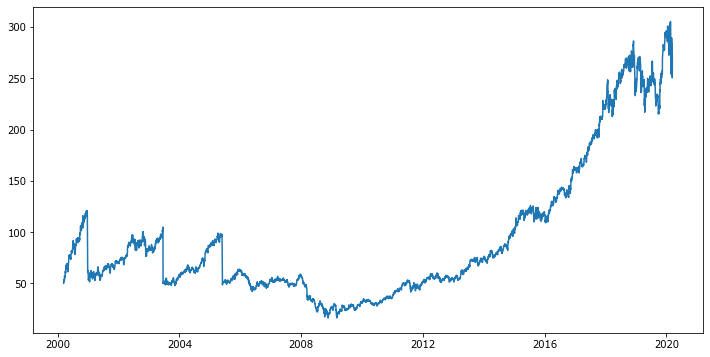

In [6]:
f, (ax1) = plt.subplots(1, figsize = (12, 6))
# preparation: input should be float type
plt.plot(df)
plt.show()

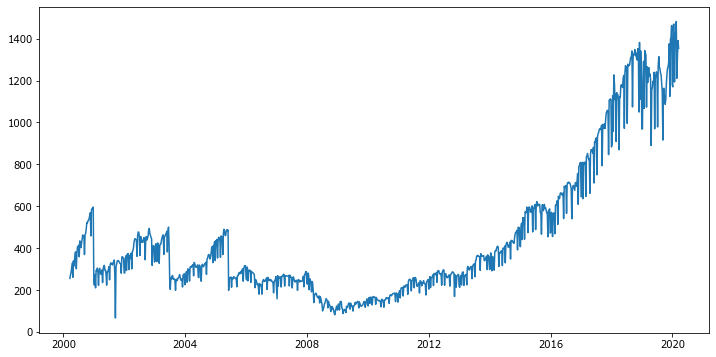

In [7]:
f, (ax1) = plt.subplots(1, figsize = (12, 6))
# Weekly Resample
df1 = df['close'].resample('W').sum().reset_index()
plt.plot(df1['index'],df1['close'])
plt.show()

The variation in standard deviation is high, mean is clearly increasing and decresing with time and this is a non-stationary series. 
Also, the test statistic is not the critical values. Note that the signed values should be compared and not the absolute values. ????

https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

Why make a non-stationary series stationary before forecasting?

Forecasting a stationary series is relatively easy and the forecasts are more reliable.

An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

Now that we’ve established that stationarizing the series important, how do you check if a given series is stationary or not?

What is the difference between white noise and a stationary series?

Like a stationary series, the white noise is also not a function of time, that is its mean and variance does not change over time. But the difference is, the white noise is completely random with a mean of 0.

In white noise there is no pattern whatsoever. If you consider the sound signals in an FM radio as a time series, the blank sound you hear between the channels is white noise.

Mathematically, a sequence of completely random numbers with mean zero is a white noise.


The reason I took up this section first was that until unless your time series is stationary, you cannot build a time series model. In cases where the stationary criterion are violated, the first requisite becomes to stationarize the time series and then try stochastic models to predict this time series. There are multiple ways of bringing this stationarity. Some of them are Detrending, Differencing etc.

Before 1970, econometricians and time series analysts used vastly different methods to model a time series. Econometricians modeled time series are a standard linear regression with explanatory variables suggested by economic theory/intuition to explain the movements in time series data. They assumed that the time series being ‘nonstationary’ (growing overtime) had no effect on their empirical analysis. Time series analysts on the other hand ignored this traditional econometric analysis. They modeled a time series as a function of its past values. They worked around the problem of nonstationarity by differencing the data to make it stationary. Then, Clive Granger and Paul Newbold happened[1]. Econometricians were forced to pay attention to the methods of time series analysts, the most famous of which was the Box–Jenkins approach developed by George P Box and Gwilym Jenkins and published in their legendary monograph Time Series Analysis: Forecasting and Control[2] .

Box and Jenkins claimed (successfully) that nonstationary data can be made stationary by differencing the series. This series,  Y∗  is the input in Box-Jenkins analysis. The general model for  Y∗ is written as,

Y∗=ϕ1Y∗t−1+ϕ2Y∗t−2...ϕpY∗t−p+ϵt+θ1ϵt−1+θ2ϵt−2+...θqϵt−q 

where  ϕ and  θ  are unknown parameters and  ϵ  are independent identically distributed error terms with zero mean. Here,  Y∗ is only expressed in terms of its past values and the current and past values of error terms. This model is called Autoregressive Integrated Moving Average or  ARIMA(p,d,q) model of  Y.p  is the number of lagged values of  Y∗ which represents the autoregressive (AR) nature of model,  q  is the number of lagged values of the error term which represents the moving average (MA) nature of model and  d is the number of times  Y  has to be differences to produce the stationary  Y∗ . The term integrated implies that in order to obtain a forecast of  Y , we have to sum up (or integrate over) the values of  Y∗  because  Y∗ are the differenced values of the original series  Y. If no differencing is involved, this model is called an Autoregressive Moving Average  [ARMA(p,q)]  with  p  and  q  retaining their original meaning and no  d. 

The term  ARIMA  or  ARMA  is very confusing because both, the  AR  and  MA  components have the same mathematical form. They are both linear combinations of present and past values of random variables. The  AR  component is the linear combination of observable values of  Y while the  MA  component is the linear combination of the unobservable white noise disturbance terms. This is just one of those trivialities that you would get used to with time.

Econometricians ignored the Box-Jenkins approach at first but were forced to pay attention to them when it  ARIMA  forecasts started consistently outperforming forecasts based on standard econometric modelling. The lack of sound economic theory behind the  ARIMA  was troubling for econometricians to accept. They responded by developing another class of models that incorporated auroregressive and moving average components of Box-Jenkins approach with the ‘explanatory variables’ approach of standard econometrics. The simplest of such models is the  ARIMAX  which is just an  ARIMA  with additional explanatory variables provided by economic theory. A standard  ARIMAX would be written as,

Y∗=β.X+ϕ1Y∗t−1+ϕ2Y∗t−2...ϕpY∗t−p+ϵt+θ1ϵt−1+θ2ϵt−2+...θqϵt−q 

where  X  can be any economic variable.

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. 

Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.

That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values.


But why is it important? 

Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

constant mean
constant variance
an autocovariance that does not depend on time.


Visualizations
The most basic methods for stationarity detection rely on plotting the data, or functions of it, and determining visually whether they present some known property of stationary (or non-stationary) data.

Looking at the data

Trying to determine whether a time series was generated by a stationary process just by looking at its plot is a dubious venture. However, there are some basic properties of non-stationary data that we can look for. 


If like me, you didn’t find at least some of these observations trivial to make by looking at the above figure, you are not the only one. Indeed, this is not a very dependable method to detect stationarity, and it is usually used to get an initial impression of the data rather than to make definite assertions.

Looking at Autocorrelation Function (ACF) plots


Autocorrelation is the correlation of a signal with a delayed copy — or a lag — of itself as a function of the delay. When plotting the value of the ACF for increasing lags (a plot called a correlogram), the values tend to degrade to zero quickly for stationary time series (see figure 1, right), while for non-stationary data the degradation will happen more slowly

Parametric tests
Another, more rigorous approach, to detecting stationarity in time series data is using statistical tests developed to detect specific types of stationarity, namely those brought about by simple parametric models of the generating stochastic process.

https://www.kdnuggets.com/2019/08/stationarity-time-series-data.html
    
##### Unit root tests

###### The Dickey-Fuller Test
The Dickey-Fuller test was the first statistical test developed to test the null hypothesis that a unit root is present in an autoregressive model of a given time series and that the process is thus not stationary. The original test treats the case of a simple lag-1 AR model.

###### The KPSS Test
Another prominent test for the presence of a unit root is the KPSS test. [Kwiatkowski et al., 1992] Conversely to the Dickey-Fuller family of tests, the null hypothesis assumes stationarity around a mean or a linear trend, while the alternative is the presence of a unit root.


What’s Stationarity Got To Do With It?
The Wikipedia definition of a stationary process is “a stochastic process whose unconditional joint probability distribution does not change when shifted in time”. I’m not sure of the general usefulness of that definition, but their second comment is more accessible: “…parameters such as mean and variance, if they are present, also do not change over time.” That’s more palatable.

Now here’s the thing about stationarity: I’ve found it incredibly confusing to research this online (Author’s note: This is a sign that I should probably just read a damn textbook). Here’s the mess of assertions that I have come across:

The data must be stationary before it is fed into an ARIMA model.
The residuals must be stationary after they are calculated from the ARIMA model.
If the data is not stationary then difference it until it becomes stationary.
If the data is not stationary then try adding in a Trend term.
While much of the above feels contradictory, it’s all fairly correct. The following walks through how I understand this, but I would be happy for feedback on where I’m wrong:

One would like to feed stationary data into a linear model because this ensures that the model will not suffer from multicollinearity such that individual predictions worsen and interpretability is reduced. One way to (try to) stationarize the data is to difference it. One typically differences the data by hand in order to determine how many times one should difference the data to make it stationary. With this knowledge in hand, one then passes the undifferenced data into the ARIMA model. The ARIMA model containes a differencing step. Differencing by hand is performed to determine the differencing order paramater (like an ML hyperparameter!) for the ARIMA model. This is all part of the Box-Jenkins method for building ARIMA models.

Another way to stationarize data is to add a trend term to a model, and we decide on differencing vs. trend terms depending on whether there is a stochastic or deterministic (pdf) trend in the data, respectively.

If the residuals are stationary after being fed through a linear model, then the Gauss-Markov theorem guarantees us that we have found the best unbiased linear estimator (BLUE) of the data. Another way to think about this is that, if we see that the residuals are not stationary, then there is probably some pattern in the data that we should be able to incorporate into our model such that the residuals become stationary. There’s also a ton of bonus goodies that we get if we can follow Gauss-Markov, such as accurate estimates of uncertainty. This leads to a big danger in that we may underestimate the uncertainty of our model (and consequently overestimate correlations) if we use Gauss-Markov theorems on non-stationary data.

I got very hung up on determining whether the data entering the model must be stationary or the residuals that result from the model must be stationary because lots of literature focuses on stationarizing the data but the theory relies on stationary residuals. Stationarizing the data is a unique aspect of ARIMA models - it helps to determine the parameters of the ARIMA model due to some theoretical things that pop out, but it is perfectly fine to feed nonstationary data into a model and hope that the model produces stationary residuals (or not even produce stationary residuals if you’re happy to give up Gauss-Markov).

One could make the argument

 Who cares about the antiquated methods for determining the parameters of my ARIMA model? I’ll just figure them out with grid search and cross validation. 
and I would half agree.

The devil on my shoulder cajoles

 Yes! Ain’t nobody got time for learning old school statistics. Compute is cheap - go for it. 
but the angel cautions

 Well, you can do that, but it may be hard to find suitable parameters and you should be aware of what you’re sacrificing in the process. 
See, a lot of the time series theory was developed and used in econometrics. In that field, it is particularly important to understand the “data generating process”, and one would like to be able to make decisions in the face of new data, new patterns, and new forecasts. There are ARIMA models that represent data generating processes that would be unrealistic in economic scenarios, and one would want to know this when developing a model!

What I would like to do is trade some of the stability and interpretability of classical time series modeling for the potentially higher accuracy and easier implementation (AKA I don’t have to know the stats or solve nonlinear PDEs) of supervised machine learning. After all, from my original most, I just want to know how many Citi Bikes will be occupying a station in the next 15 minutes. This is not mission critical!

In [8]:
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import KPSS, ZivotAndrews, VarianceRatio

def test_stationarity(timeseries):
    f, (ax) = plt.subplots(1, figsize = (12, 6))
    #Determing rolling statistics
    rolmean = timeseries.rolling(15).mean()
    rolstd =  timeseries.rolling(15).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    # KPSS test
    kpss = KPSS(timeseries)
    print(kpss.summary().as_text())
    
    # Changing the trend 
    print("KPSS change trend")
    kpss.trend = 'ct'
    print(kpss.summary().as_text())
    
    # The Zivot-Andrews test allows the possibility of a single structural break in the series.
    za = ZivotAndrews(timeseries)
    print(za.summary().as_text())
    
    # Variance Ratio Testing
    # Variance ratio tests are not usually used as unit root tests, and are instead used for testing whether a financial return series is a pure random walk versus having some predictability. 
    # The variance ratio compares the variance of a 1-period return to that of a multi-period return. The comparison length has to be set when initializing the test.

    # This example compares 1-day to 12-day returns, and the null that the series is a pure random walk is rejected. Positive values indicate some negative autocorrelation (momentum).
    
    vr = VarianceRatio(timeseries, 7)
    print(vr.summary().as_text())

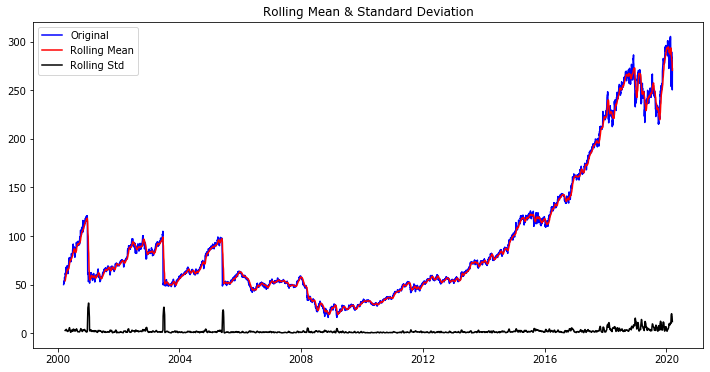

Results of Dickey-Fuller Test:
Test Statistic                    0.642626
p-value                           0.988620
#Lags Used                        8.000000
Number of Observations Used    5024.000000
Critical Value (1%)              -3.431652
Critical Value (5%)              -2.862115
Critical Value (10%)             -2.567076
dtype: float64
    KPSS Stationarity Test Results   
Test Statistic                  6.231
P-value                         0.000
Lags                               42
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS change trend
    KPSS Stationarity Test Results   
Test Statistic                  2.647
P-value                         0.000
Lags                               42
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0

In [9]:
test_stationarity(df['close'])

### Log

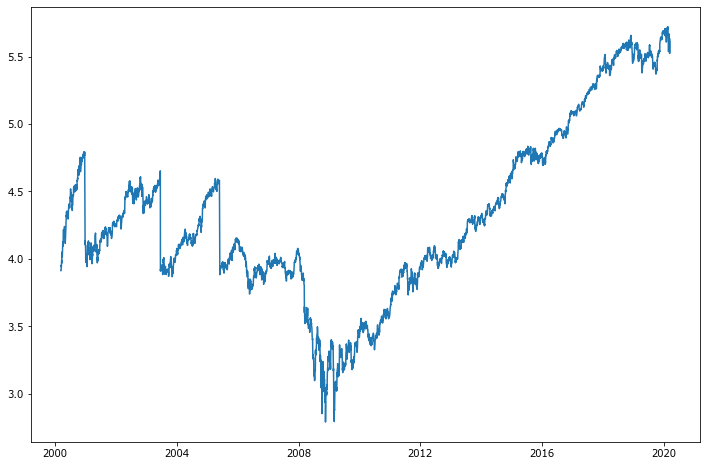

In [10]:
f, (ax1) = plt.subplots(1, figsize = (12, 8))
ts_log = np.log(df['close'])
plt.plot(ts_log)

### Moving average
In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

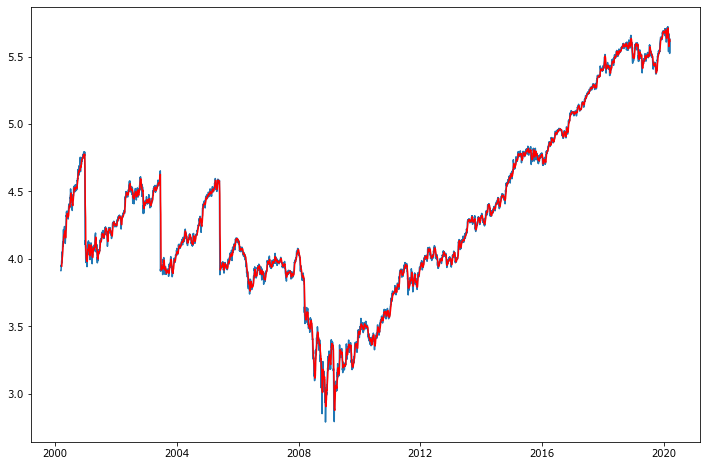

In [11]:
f, (ax1) = plt.subplots(1, figsize = (12, 8))
moving_avg = ts_log.rolling(7).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 7 values, rolling mean is not defined for first 6 values. This can be observed as:

In [12]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(8)

index
2000-03-13         NaN
2000-03-14         NaN
2000-03-15         NaN
2000-03-16         NaN
2000-03-17         NaN
2000-03-20         NaN
2000-03-21    0.042756
2000-03-22    0.014940
Name: close, dtype: float64

Notice the first 6 being Nan. Lets drop these NaN values and check the plots to test stationarity.

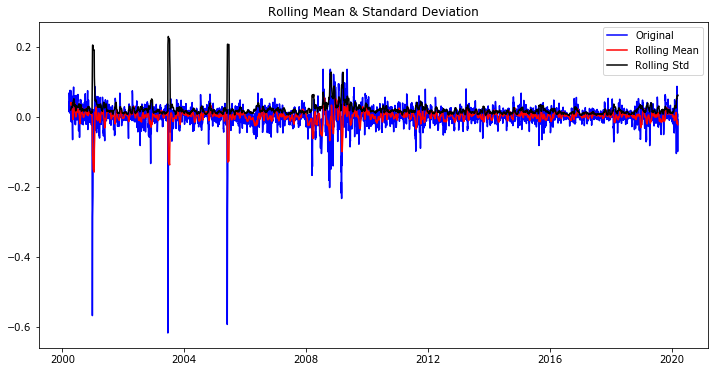

Results of Dickey-Fuller Test:
Test Statistic                  -19.288470
p-value                           0.000000
#Lags Used                       10.000000
Number of Observations Used    5016.000000
Critical Value (1%)              -3.431654
Critical Value (5%)              -2.862116
Critical Value (10%)             -2.567077
dtype: float64
    KPSS Stationarity Test Results   
Test Statistic                  0.197
P-value                         0.274
Lags                               26
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS change trend
    KPSS Stationarity Test Results   
Test Statistic                  0.059
P-value                         0.457
Lags                               26
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0

In [13]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

This looks does not look like a much better series. The rolling values appear to be varying highly and there is a specific trend. Also, the test statistic is larger than the 5% critical values so we can say with 95% confidence that this is not a stationary series.

However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take 15 days averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor. Find details here. This can be implemented in Pandas as:

https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.ewma.html

https://pandas.pydata.org/pandas-docs/version/0.17.0/timeseries.html

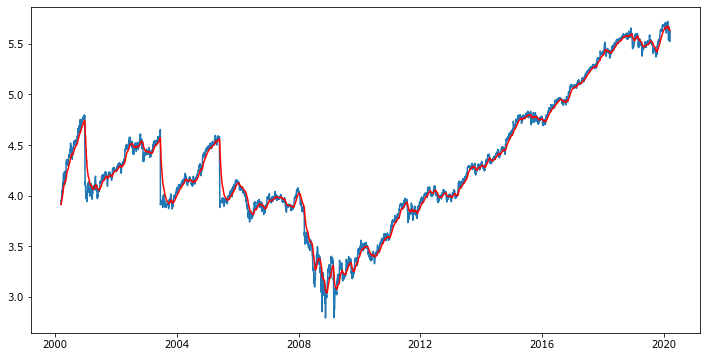

In [14]:
f, (ax1) = plt.subplots(1, figsize = (12, 6))
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 7 values, rolling mean is not defined for first 6 values. This can be observed as:

Note that here the parameter ‘halflife’ is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain. Other parameters like span and center of mass can also be used to define decay which are discussed in the link shared above. Now, let’s remove this from series and check stationarity:

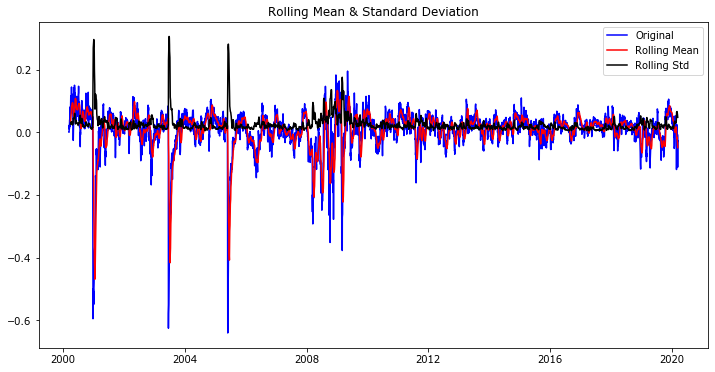

Results of Dickey-Fuller Test:
Test Statistic                -1.134858e+01
p-value                        1.012656e-20
#Lags Used                     1.000000e+01
Number of Observations Used    5.022000e+03
Critical Value (1%)           -3.431653e+00
Critical Value (5%)           -2.862116e+00
Critical Value (10%)          -2.567076e+00
dtype: float64
    KPSS Stationarity Test Results   
Test Statistic                  0.371
P-value                         0.086
Lags                               40
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS change trend
    KPSS Stationarity Test Results   
Test Statistic                  0.091
P-value                         0.205
Lags                               40
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 

In [15]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

This TS has no less variations in mean and standard deviation in magnitude. Also, the test statistic is larger than the 10% critical value, which is same as the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

### Eliminating Trend and Seasonality
The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

1. Differencing – taking the differece with a particular time lag
2. Decomposition – modeling both trend and seasonality and removing them from the model.
#### Differencing
One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as:

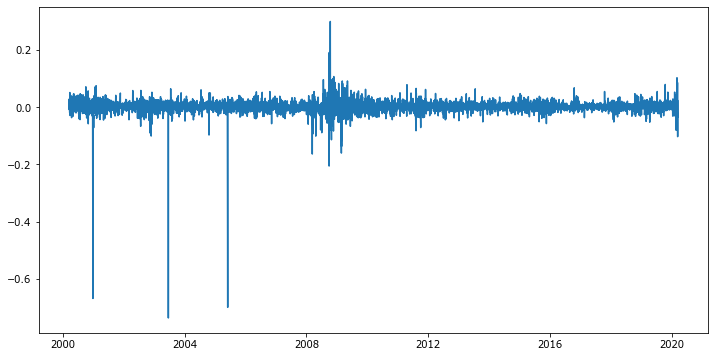

In [16]:
f, (ax1) = plt.subplots(1, figsize = (12, 6))
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

##### This appears to have reduced trend considerably. Lets verify using our plots:

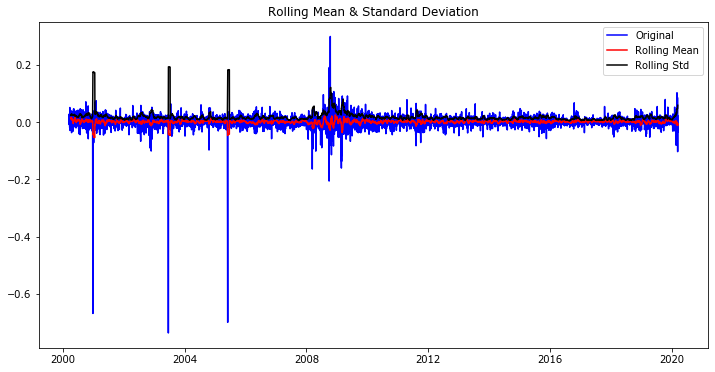

Results of Dickey-Fuller Test:
Test Statistic                  -23.904246
p-value                           0.000000
#Lags Used                        9.000000
Number of Observations Used    5022.000000
Critical Value (1%)              -3.431653
Critical Value (5%)              -2.862116
Critical Value (10%)             -2.567076
dtype: float64
    KPSS Stationarity Test Results   
Test Statistic                  0.158
P-value                         0.366
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS change trend
    KPSS Stationarity Test Results   
Test Statistic                  0.050
P-value                         0.569
Lags                                8
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0

In [17]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

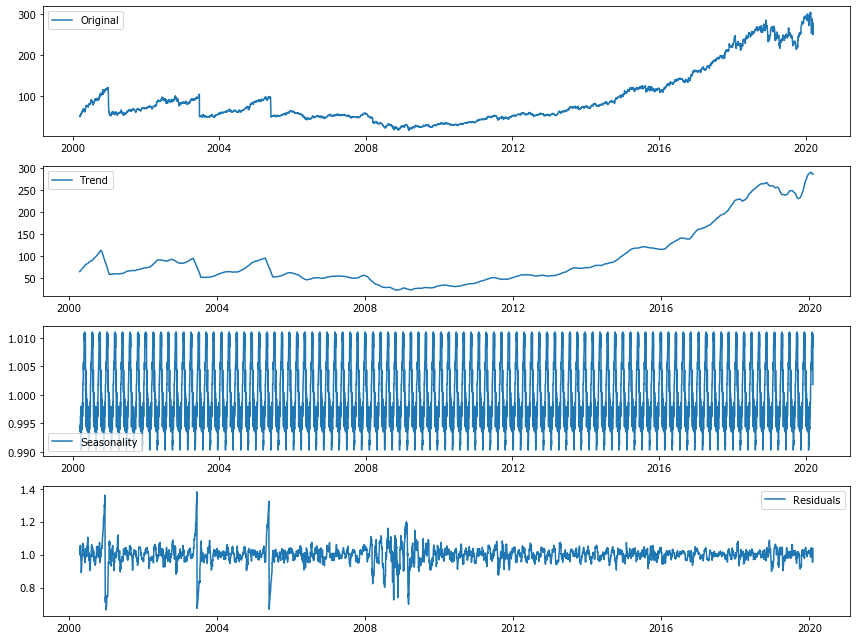

In [26]:
# Multiplicative
freq = 52
f, (ax1) = plt.subplots(1, figsize = (12, 9))
decomposition_mul = seasonal_decompose(df['close'], model='multiplicative', freq = 52)
trend = decomposition_mul.trend
seasonal = decomposition_mul.seasonal
residual = decomposition_mul.resid

plt.subplot(411)
plt.plot(df['close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Additive

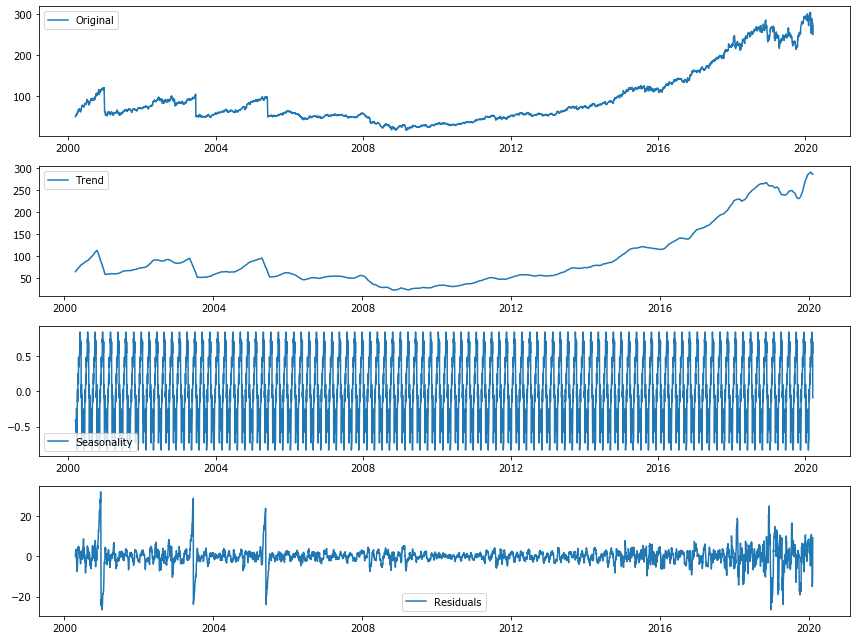

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
f, (ax1) = plt.subplots(1, figsize = (12, 9))
decomposition_add = seasonal_decompose(df['close'], model='additive', freq = 52)
trend = decomposition_add.trend
seasonal = decomposition_add.seasonal
residual = decomposition_add.resid

plt.subplot(411)
plt.plot(df['close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the beginning of the series.

If you look at the residuals of the additive decomposition closely, it has some pattern left over. The multiplicative decomposition, however, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

The numerical output of the trend, seasonal and residual components are stored in the decomposition_mul output itself. Let’s extract them and put it in a dataframe.

In [30]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([decomposition_mul.seasonal, decomposition_mul.trend, decomposition_mul.resid, decomposition_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
index,,,,
2000-03-13,0.994460,NaN,NaN,50.06
2000-03-14,0.993743,NaN,NaN,50.06
2000-03-15,0.994262,NaN,NaN,51.44
2000-03-16,0.993481,NaN,NaN,52.12
2000-03-17,0.994440,NaN,NaN,51.62


Checking Stationarity
For posterity, let’s walk through how to look at the stationarity of the data (like, in the proper way to estimate ARIMA parameters). The common method of checking to see if data is stationary is to plot its autocorrelation function. The autocorrelation involves “sliding” or “shifting” a function and multiplying it with its unshifted self. This allows one to measure the overlap of the function with itself at different points in time. This process ends up being useful for discovering periodicity in ones data. For example, a sine wave repeats itself every 2\pi2π, so one would see peaks in the autocorrelation function every 2\pi2π. If that’s confusing, please check out this great post which contains an explanatory animation.

We can use statsmodels to plot our autocorrelation function. We can use the autocorrelation function to quantify this. Below, I plot three autocorrelations at different numbers of “lags” (the terminology statsmodels uses). Our residual samples are 5 minutes apart. Each plot below looks at the autocorrelation going out to some time window or “number of lags”. Autocorrelations always start at 1 (a function perfectly overlaps with itself), but we would like to see that it drops down close to zero. These plots show that it certaintly does not!

Notice that the autocorrelation rises as we hit 1-day of periodicity in the second plot. In the third plot, we get daily peaks but an even bigger peak out at the seventh day which corresponds to the weekly periodicity or “seasonality”.

Autocorrelation is a problem in regular regressions like above, but we'll use it to our advantage when we setup an ARIMA model below. The basic idea is pretty sensible: if your regression residuals have a clear pattern, then there's clearly some structure in the data that you aren't taking advantage of. If a positive residual today means you'll likely have a positive residual tomorrow, why not incorporate that information into your forecast, and lower your forecasted value for tomorrow? That's pretty much what ARIMA does.

It's important that your dataset be stationary, otherwise you run the risk of finding spurious correlations. A common example is the relationship between number of TVs per person and life expectancy. It's not likely that there's an actual causal relationship there. Rather, there could be a third variable that's driving both (wealth, say). Granger and Newbold (1974) had some stern words for the econometrics literature on this.

In [31]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
def viz_stationary(timeseries, n_lags):
    lag_acf = acf(timeseries, nlags=n_lags)
    lag_pacf = pacf(timeseries, nlags=n_lags, method='ols')
    f, (ax1) = plt.subplots(1, figsize = (12, 5))
    #Plot ACF: 
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')

    #Plot PACF:
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()

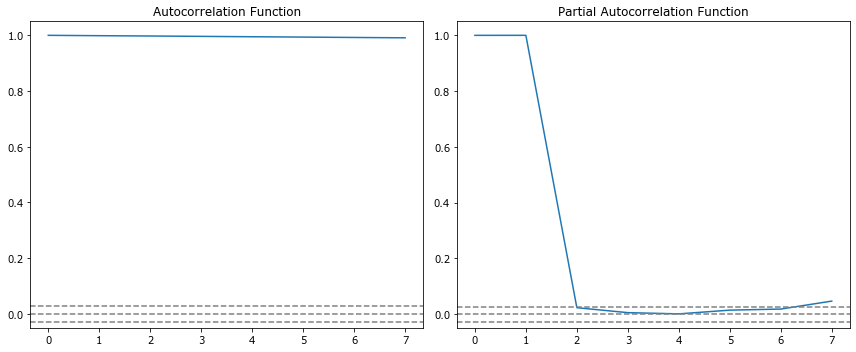

In [34]:
viz_stationary(df['close'], 7)

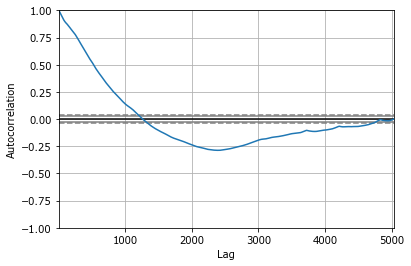

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['close'].tolist())

#### Lag Plots
A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

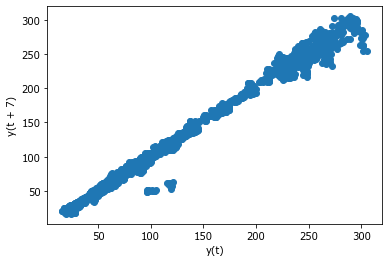

In [36]:
# Lag Plot
pd.plotting.lag_plot(df['close'], lag = 7)

Actually, its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

Note: I’ll be discussing a number of methods. Some might work well in this case and others might not. But the idea is to get a hang of all the methods and not focus on just the problem at hand.

Let’s start by working on the trend part.

### Estimating & Eliminating Trend

In this simpler case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

* Aggregation – taking average for a time period like monthly/weekly averages
* Smoothing – taking rolling averages
* Polynomial Fitting – fit a regression model

One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. 



So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=7.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=7.
For D, we need to look which lagged version differencing made the series stationary.if X — X.shift(1) makes your X series stationary, D =1.

Now, lets make 3 different ARIMA models considering individual as well as combined effects. I will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.

We need to load the ARIMA model first:

P = Using AutoCorrelation plot for AR
D = For Integrated term in AR-I-MA
Q = Using PartialAutoCorrelation plot for MA

We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications. I leave it to you to try them out.

#### Decomposing
In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned. I’ll skip the statistics and come to the results:

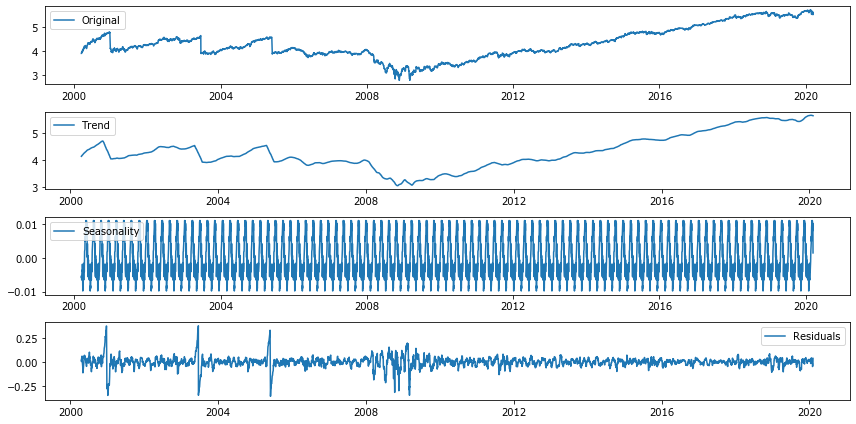

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq = 52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
f, (ax1) = plt.subplots(1, figsize = (12, 6))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

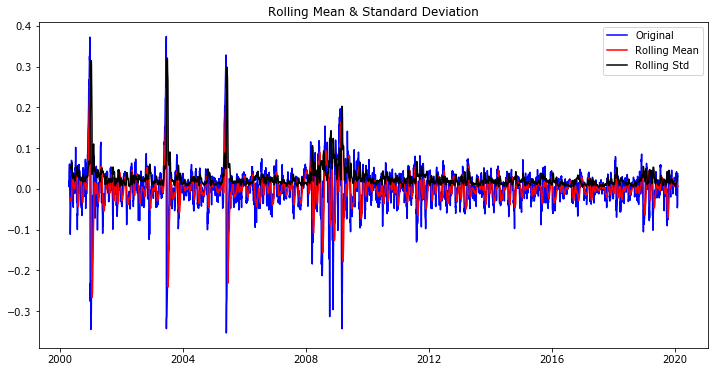

Results of Dickey-Fuller Test:
Test Statistic                -1.784704e+01
p-value                        3.090030e-30
#Lags Used                     2.200000e+01
Number of Observations Used    4.958000e+03
Critical Value (1%)           -3.431670e+00
Critical Value (5%)           -2.862123e+00
Critical Value (10%)          -2.567080e+00
dtype: float64
    KPSS Stationarity Test Results   
Test Statistic                  0.005
P-value                         0.999
Lags                               37
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS change trend
    KPSS Stationarity Test Results   
Test Statistic                  0.005
P-value                         0.999
Lags                               37
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 

In [39]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. You can try advanced decomposition techniques as well which can generate better results. Also, you should note that converting the residuals into original values for future data in not very intuitive in this case.

### How to estimate the forecastability of a time series?
The more regular and repeatable patterns a time series has, the easier it is to forecast. The ‘Approximate Entropy’ can be used to quantify the regularity and unpredictability of fluctuations in a time series.

The higher the approximate entropy, the more difficult it is to forecast it.

Another better alternate is the ‘Sample Entropy’.

Sample Entropy is similar to approximate entropy but is more consistent in estimating the complexity even for smaller time series. For example, a random time series with fewer data points can have a lower ‘approximate entropy’ than a more ‘regular’ time series, whereas, a longer random time series will have a higher ‘approximate entropy’.

Sample Entropy handles this problem nicely. 

In [41]:
# https://en.wikipedia.org/wiki/Approximate_entropy
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(df['close'], m=2, r=0.2*np.std(df['close'])))  

0.04689861829178743


In [42]:
# https://en.wikipedia.org/wiki/Sample_entropy
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(df['close'], m=2, r=0.2*np.std(df['close'])))  

0.02667035251324741


### Forecasting a Time Series

We saw different techniques and all of them worked reasonably well for making the TS stationary. Lets make model on the TS after differencing as it is a very popular technique. Also, its relatively easier to add noise and seasonality back into predicted residuals in this case. Having performed the trend and seasonality estimation techniques, there can be two situations:

A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.
Let me give you a brief introduction to ARIMA. I won’t go into the technical details but you should understand these concepts in detail if you wish to apply them more effectively. ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.
The ACF and PACF plots for the TS after differencing can be plotted as:

#### Why and How to smoothen a time series?

Smoothening of a time series may be useful in:

Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
The smoothed version of series can be used as a feature to explain the original series itself.
Visualize the underlying trend better
So how to smoothen a series? Let’s discuss the following methods:

Take a moving average
Do a LOESS smoothing (Localized Regression)
Do a LOWESS smoothing (Locally Weighted Regression)
Moving average is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

LOESS, short for ‘LOcalized regrESSion’ fits multiple regressions in the local neighborhood of each point. It is implemented in the statsmodels package, where you can control the degree of smoothing using frac argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

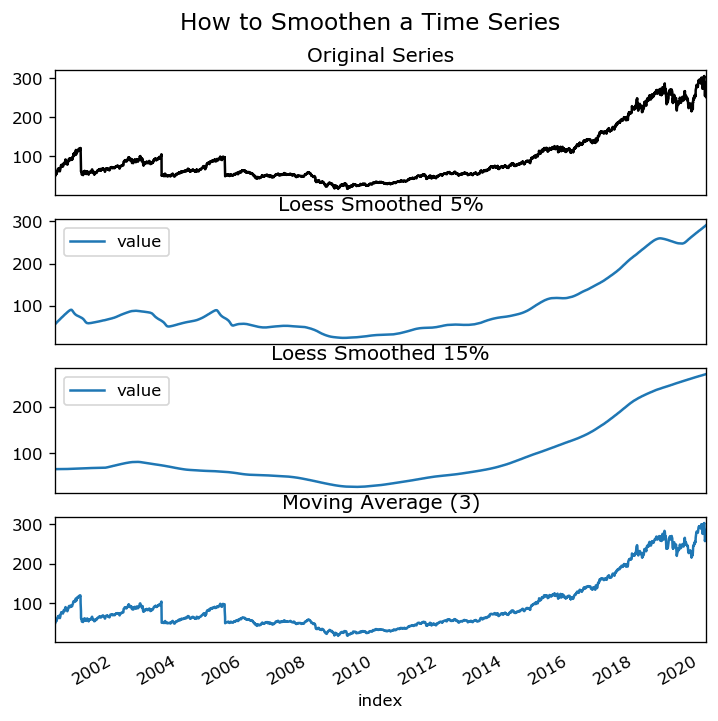

In [43]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = df['close']

# 1. Moving Average
df_ma = df_orig.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig, np.arange(len(df_orig)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig, np.arange(len(df_orig)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig.plot(ax=axes[0], color='k', title='Original Series')
df_loess_5.plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15.plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

What is an ARIMA model?
Last post, we built an autoregressive model. Recall that we had a function yy which dependended on time (tt), and we wanted to build a model, \hat{y} 
y
^
​	
 , to predict yy. In that post, we created “features” (aka a design matrix) which consisted of previous values of yy. We then learned the weights of these features via linear regression. If we considered the previous two values of yy as our features, then we can write this mathematically as

\hat{y}_{t} = a_{1}y_{t - 1} + a_{2}y_{t - 2}
y
^
​	
  
t
​	
 =a 
1
​	
 y 
t−1
​	
 +a 
2
​	
 y 
t−2
​	
 
where a_{j}a 
j
​	
  is linear regression coefficient for the jj-th previous value of yy. These are the AutoRegressive terms (the AR in ARIMA).

Next are the Integrated terms. These are for if you want to predict the difference between pairs of yy values as opposed to predicting yy directly. We can think of this like a preprocessing step to our data. As an example, the first order integrated model would transform our yy into y^{*}y 
∗
  as follows:

y^{*}_{t} = y_{t} - y_{t - 1}
y 
t
∗
​	
 =y 
t
​	
 −y 
t−1
​	
 
I read some anecdote that these are called the Integrated terms because we’re dealing with the deltas in our data which is somehow related to integrals. I mean, I know what an integral is and what it means to add up the little dxdx's in a function, but I don’t fully get the analogy.

The last term in ARIMA is the Moving Average. This actually ruins my grand plan of scikit-learning all time series analysis by translating everything into the form of \hat{y_{t}} = f(\mathbf{X}_{t}) 
y 
t
​	
 
^
​	
 =f(X 
t
​	
 ). The reason is that the moving average terms are the difference between the true values of yy at previous points in time and our prediction, \hat{y} 
y
^
​	
 . For example, 2 moving average terms would look like

\hat{y}_{t} = m_{1}(y_{t - 1} - \hat{y}_{t - 1}) + m_{2}(y_{t - 2} - \hat{y}_{t - 2})
y
^
​	
  
t
​	
 =m 
1
​	
 (y 
t−1
​	
 − 
y
^
​	
  
t−1
​	
 )+m 
2
​	
 (y 
t−2
​	
 − 
y
^
​	
  
t−2
​	
 )
When the moving average terms are combined with the AR and I terms, then you end up with a gnarly equation that cannot be simplified into a nice, design matrix form because it is, in fact, a nonlinear partial differential equation.

Okay, that’s an ARIMA model: 2 different types of “features” that we can build out of previous values of yy and a preprocessing step.





https://www.statsmodels.org/stable/tsa.html

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

* p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=7.
* q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=7.

For D, we need to look which lagged version differencing made the series stationary.if X — X.shift(1) makes your X series stationary, D =1.

Now, lets make 3 different ARIMA models considering individual as well as combined effects. I will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.

We need to load the ARIMA model first:

* P = Using AutoCorrelation plot for AR
* D = For Integrated term in AR-I-MA
* Q = Using PartialAutoCorrelation plot for MA

In [46]:
from statsmodels.tsa.arima_model import AR, ARMA, ARIMA

The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q). Let model the 3 cases:

### AR Model

Text(0.5, 1.0, 'RSS: nan')

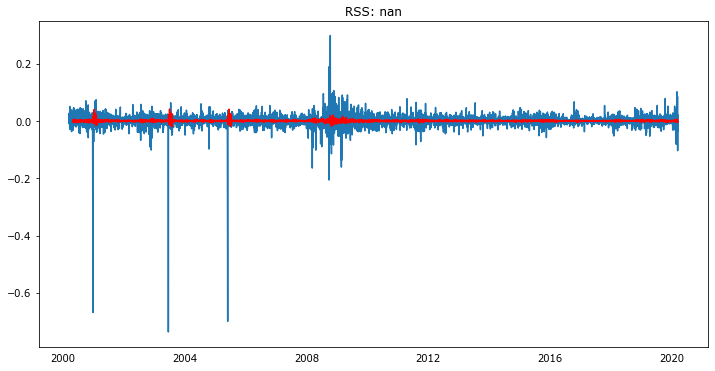

In [55]:
model = AR(ts_log_diff)  
results_AR = model.fit(disp=-1)  
f, (ax1) = plt.subplots(1, figsize = (12, 6))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### Autoregressive Moving-Average Processes (ARMA)  Model

Text(0.5, 1.0, 'RSS: 3.3811')

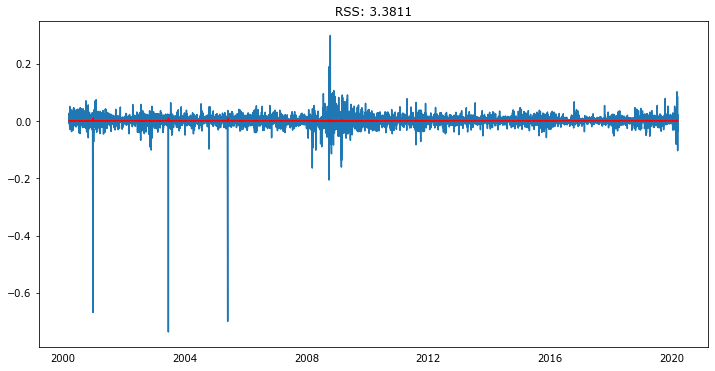

In [56]:
model = ARMA(ts_log_diff, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
f, (ax1) = plt.subplots(1, figsize = (12, 6))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### Combined Model

In [52]:
ts_log_diff

index
2000-03-14    0.000000
2000-03-15    0.027194
2000-03-16    0.013133
2000-03-17   -0.009640
2000-03-20    0.026383
                ...   
2020-03-09   -0.037434
2020-03-10    0.023707
2020-03-11   -0.007960
2020-03-12   -0.103730
2020-03-13    0.082850
Name: close, Length: 5032, dtype: float64

Text(0.5, 1.0, 'RSS: 3.4451')

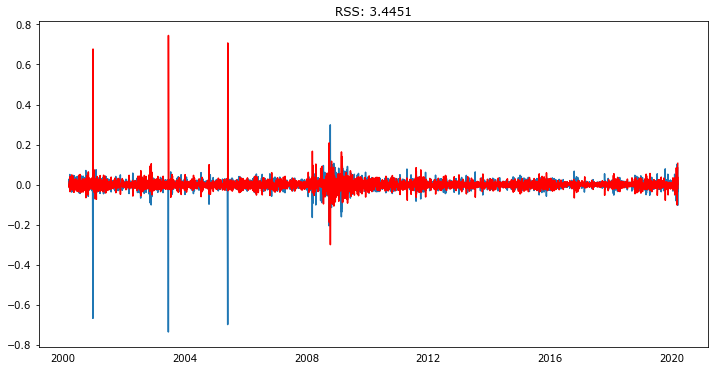

In [58]:
model = ARIMA(ts_log_diff, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-6)  
f, (ax1) = plt.subplots(1, figsize = (12, 6))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues)**2))

Here we can see that the ARIMA and MA models have almost the same RSS but AR is significantly better. Now, we are left with 1 last step, i.e. taking these values back to the original scale.

### Taking it back to original scale
Since the combined model gave best result, lets scale it back to the original values and see how well it performs there. First step would be to store the predicted results as a separate series and observe it.

Once you are done with forecasting, don’t forget to trace back all transformation you made to your original series(most common mistake). Additionally, in the same reverse sequence(follow LIFO, Last applied transformation reverted first). Do create a copy of your series. It will help you out in recovering things back. For example, if you applied log() first and then differencing, first add what has been subtracted(using backup copy I asked you to keep) and than exp() over that.

In [60]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

index
2000-03-15    2.065431e-07
2000-03-16   -1.352345e-02
2000-03-17    1.679901e-04
2000-03-20    1.730834e-02
2000-03-21   -1.484372e-02
dtype: float64


How to treat missing values in a time series?
Sometimes, your time series will have missing dates/times. That means, the data was not captured or was not available for those periods. It could so happen the measurement was zero on those days, in which case, case you may fill up those periods with zero.

Secondly, when it comes to time series, you should typically NOT replace missing values with the mean of the series, especially if the series is not stationary. What you could do instead for a quick and dirty workaround is to forward-fill the previous value.

However, depending on the nature of the series, you want to try out multiple approaches before concluding. Some effective alternatives to imputation are:

Backward Fill
Linear Interpolation
Quadratic interpolation
Mean of nearest neighbors
Mean of seasonal couterparts
To measure the imputation performance, I manually introduce missing values to the time series, impute it with above approaches and then measure the mean squared error of the imputed against the actual values.


Notice that these start from ‘2019-04-02 ’ and not the first day.

Why?

This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. The cumulative sum can be found as:

In [61]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

index
2000-03-15    2.065431e-07
2000-03-16   -1.352324e-02
2000-03-17   -1.335525e-02
2000-03-20    3.953088e-03
2000-03-21   -1.089063e-02
dtype: float64


You can quickly do some back of mind calculations using previous output to check if these are correct. Next we’ve to add them to base number. For this lets create a series with all values as base number and add the differences to it. This can be done as:

In [62]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

index
2000-03-13    3.913222
2000-03-14    3.913222
2000-03-15    3.913222
2000-03-16    3.899699
2000-03-17    3.899867
dtype: float64

Here the first element is base number itself and from thereon the values cumulatively added. Last step is to take the exponent and compare with the original series.

Text(0.5, 1.0, 'RMSE: 391.7916')

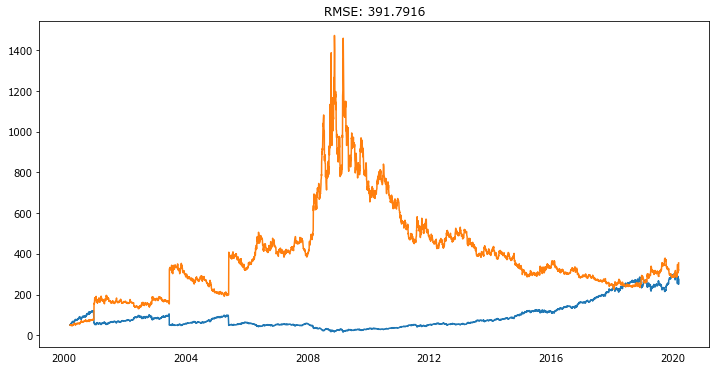

In [64]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
f, (ax1) = plt.subplots(1, figsize = (12, 6))
plt.plot(df['close'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df['close'])**2)/len(df['close'])))

#### References:
* https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
* https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/
* https://medium.com/analytics-vidhya/preprocessing-for-time-series-forecasting-3a331dbfb9c2
* http://www.gregreda.com/2020/02/16/feature-engineering-with-time-gaps/
* https://www.machinelearningplus.com/time-series/time-series-analysis-python/
* https://www.kdnuggets.com/2019/08/stationarity-time-series-data.html
* http://bashtage.github.io/arch/doc/index.html
* https://www.alphavantage.co/documentation/
    